# <center><span style="font-family: Arial; font-weight:bold;font-size:2.3em;">Project - Neural Networks

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing all the necessary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers, layers, models
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical

import h5py

# <center><span style="font-family: Arial; font-weight:bold;font-size:2em;">PART - A</center>

**`DOMAIN`**: Electronics and Telecommunication

**`CONTEXT`**: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

**`DATA DESCRIPTION`:** The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

**`PROJECT OBJECTIVE`**: To build a classifier which can use the given parameters to determine the signal strength or quality.

# ***Import and Understand the data***

### Part 1. 1 a - Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [3]:
# Path to your CSV file
file_path = '/content/drive/MyDrive/Neural Network & Deep Learning /Project/Dataset files/Signal.csv'
sig_data = pd.read_csv(file_path)
sig_data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.1 b - Check for missing values and print percentage for each attribute.

In [4]:
sig_data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [5]:
sig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 1.1 c - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [6]:
sig_data.duplicated().sum()

240

In [7]:
# Check for duplicate rows in the dataset
duplicate_rows = sig_data[sig_data.duplicated()]

# Display any duplicate rows found
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [8]:
print("shape of the dataset before removing duolicates: ",sig_data.shape)

shape of the dataset before removing duolicates:  (1599, 12)


In [9]:
# Remove duplicate rows from the dataset
sig_data = sig_data.drop_duplicates()
print("Shape of the dataset after removing duplicates:", sig_data.shape)

Shape of the dataset after removing duplicates: (1359, 12)


### 1.1 d- Visualise distribution of the target variable.

In [10]:
sig_data['Signal_Strength'].nunique()

6

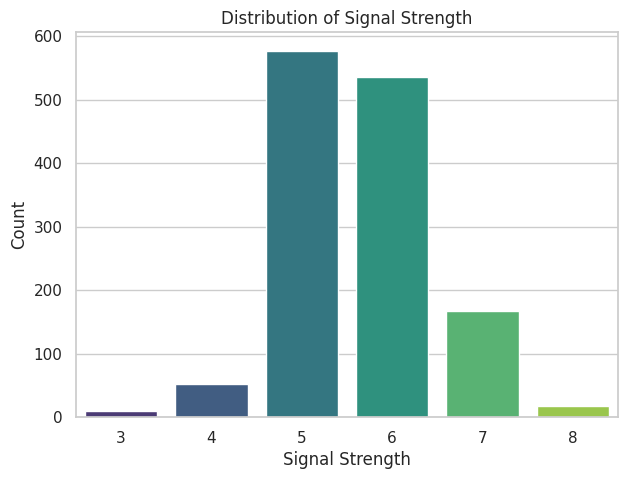

In [11]:
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(7, 5))
sns.countplot(x='Signal_Strength', data=sig_data, palette='viridis')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.title('Distribution of Signal Strength')
plt.show()

### Part 1.1 e - Share insights from the initial data analysis.

### **Insights** -

* **Signal Strength Distribution:** The distribution of the Signal_Strength variable shows that the majority of signal strengths fall between 5 and 6 according to the dataset. There's a relatively higher count of instances for these signal strength levels compared to others. This might suggest that the dataset is imbalanced in terms of signal strengths, with a bias toward these particular values.

* **Parameters Range and Variability:** Looking at the statistical summary of parameters like Parameter 1 to Parameter 11, we observe varying ranges and standard deviations among these features. For instance, Parameter 6 (which could represent a specific feature) has a larger standard deviation compared to others, suggesting higher variability in its values. This variability among parameters might influence the prediction of signal strength and could require careful consideration during model training.

# ***Data pre-processing***

### 1.2 a - Split the data into X & Y

In [12]:
# Split the data into X (input features) and Y (target variable)
X = sig_data.drop('Signal_Strength', axis=1)
Y = sig_data['Signal_Strength']

# Display the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1359, 11)
Shape of Y: (1359,)


### 1.2 b - Split the data into train & test with 70:30 proportion.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

### 1.2 c - Print shape of all the 4 variables and verify if train and test data is in sync.

In [14]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Verify if train and test data are in sync
train_test_sync = (X_train.index == Y_train.index).all() and (X_test.index == Y_test.index).all()
if train_test_sync:
    print("Train and test data are in sync.")
else:
    print("Train and test data are not in sync. Check the data split.")

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)
Train and test data are in sync.


### 1.2 d - Normalize the train and test data with appropriate method

In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and test data transform it using same scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1.2 e - Transform Labels into format acceptable by Neural Network

In [16]:
# Initialize the LabelBinarizer
label_binarizer = LabelBinarizer()

Y_train_encoded = label_binarizer.fit_transform(Y_train)
Y_test_encoded = label_binarizer.transform(Y_test)

This code will transform the categorical labels (Y_train and Y_test) into a one-hot encoded format using LabelBinarizer. The resulting DataFrames Y_train_encoded and Y_test_encoded will have binary columns representing each class.

 # ***Model Training & Evaluation using Neural Network***

### 1.3 a - Design a Neural Network to train a classifier

In [17]:
# Initialize the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(11,)))  # Input layer with 11 input features
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(6, activation='softmax'))  # Output layer with six neurons for six classes

# Compile the model
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 3478 (13.59 KB)
Trainable params: 3478 (13.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 1.3 b - Train the classifier using previously designed Architecture

In [19]:
history = model.fit(X_train_scaled, Y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test_encoded))

Epoch 1/50
30/30 [==============================] - 2s 26ms/step - loss: 1.5990 - accuracy: 0.3817 - val_loss: 1.4404 - val_accuracy: 0.4289
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 1.2498 - accuracy: 0.4995 - val_loss: 1.1729 - val_accuracy: 0.4877
Epoch 3/50
30/30 [==============================] - 0s 8ms/step - loss: 1.0631 - accuracy: 0.5846 - val_loss: 1.1170 - val_accuracy: 0.5196
Epoch 4/50
30/30 [==============================] - 0s 7ms/step - loss: 1.0035 - accuracy: 0.6015 - val_loss: 1.0867 - val_accuracy: 0.5515
Epoch 5/50
30/30 [==============================] - 0s 12ms/step - loss: 0.9771 - accuracy: 0.6141 - val_loss: 1.0912 - val_accuracy: 0.5245
Epoch 6/50
30/30 [==============================] - 0s 12ms/step - loss: 0.9532 - accuracy: 0.6299 - val_loss: 1.0922 - val_accuracy: 0.5221
Epoch 7/50
30/30 [==============================] - 0s 10ms/step - loss: 0.9382 - accuracy: 0.6288 - val_loss: 1.1007 - val_accuracy: 0.5294
Epoch 8/50
30/30

### 1.3 c - Plot 2 separate visuals.
i) Training Loss and Validation Loss

ii) Training Accuracy and Validation Accuracy

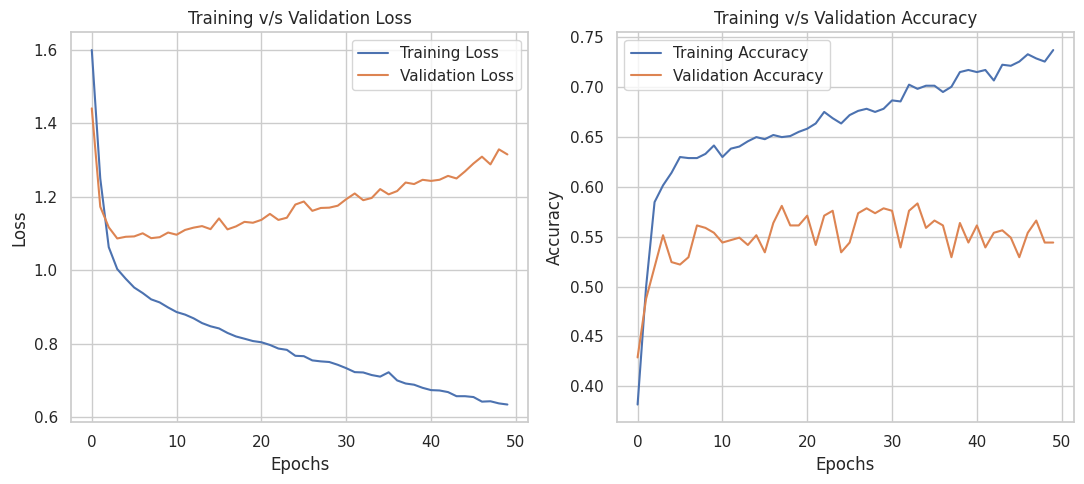

In [20]:
plt.figure(figsize=(11, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 1.3 d - Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [21]:
# Define a new model with dropout layers
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dropout(0.5))  # Adding dropout layer with 30% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train the classifier with the updated architecture
history = model.fit(X_train_scaled, Y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test_encoded))

Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 1.7772 - accuracy: 0.2808 - val_loss: 1.5315 - val_accuracy: 0.4485
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 1.5767 - accuracy: 0.4090 - val_loss: 1.3449 - val_accuracy: 0.5025
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 1.3709 - accuracy: 0.4627 - val_loss: 1.2321 - val_accuracy: 0.5123
Epoch 4/50
30/30 [==============================] - 0s 5ms/step - loss: 1.2780 - accuracy: 0.5047 - val_loss: 1.1683 - val_accuracy: 0.5245
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 1.2352 - accuracy: 0.5089 - val_loss: 1.1310 - val_accuracy: 0.5245
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1835 - accuracy: 0.5489 - val_loss: 1.1073 - val_accuracy: 0.5294
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1923 - accuracy: 0.5436 - val_loss: 1.0994 - val_accuracy: 0.5245
Epoch 8/50
30/30 [=

### 1.3 e - Plot visuals as in Q3.C and share insights about difference observed in both the models.

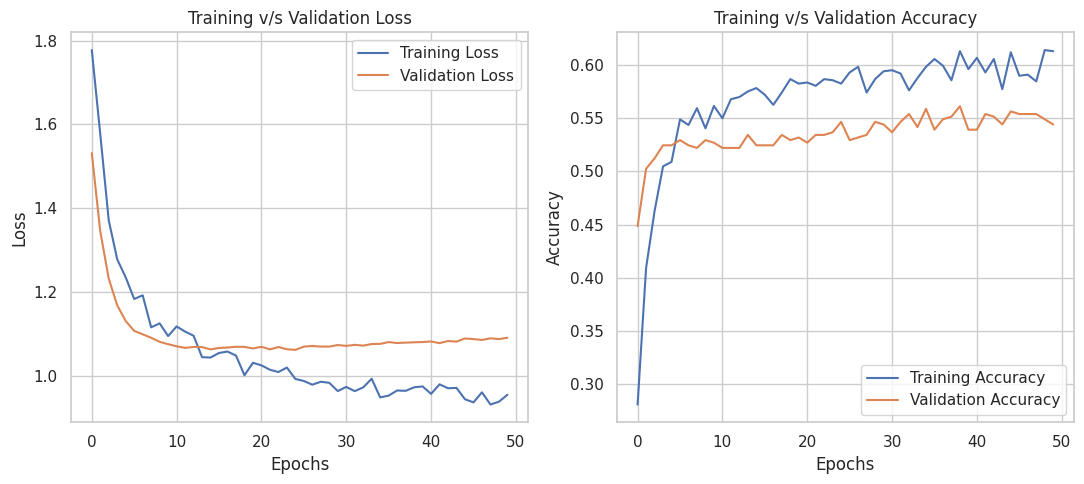

In [23]:
plt.figure(figsize=(11, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## **Training vs. Validation Loss:**

**Original Model:**

* Started with a training loss of 1.6286 and a validation loss of 1.4143.
Generally decreased with fluctuations, reaching a final training loss of 0.6343 and validation loss of 1.3130.
* The gap between training and validation loss persisted and varied over epochs.

**Updated Model:**

* Started with a training loss of 1.8730 and a validation loss of 1.5458.
* Steadily decreased with fluctuations, ending with a training loss of 0.9439 and a validation loss of 1.0995.
* Showed a consistent reduction in the gap between training and validation loss compared to the original model.

## **Training vs. Validation Accuracy:**

**Original Model:**

* Began with a training accuracy of 0.3186 and a validation accuracy of 0.4804.
* Increased over epochs, reaching a training accuracy of 0.7424 and a validation accuracy of 0.5245.
* There was a consistent gap between training and validation accuracy throughout the epochs.

**Updated Model:**

* Started with a training accuracy of 0.2366 and a validation accuracy of 0.4461.
* Progressed to a training accuracy of 0.6004 and a validation accuracy of 0.5466.
* Reduced the gap between training and validation accuracy compared to the original model.

## **Insights:**

* Both models showed signs of overfitting, but the updated model demonstrated improvements in reducing overfitting tendencies.
* The updated model presented a steadier convergence of training and validation metrics compared to the original model, indicating better generalization.
* Despite the reduction in the gap between metrics, there's still room for improvement in reducing overfitting further and improving generalization in the updated model.

### *****************************************************************************************************************************

# <center><span style="font-family: Arial; font-weight:bold;font-size:2em;">PART - B</center>

**`DOMAIN`:** Autonomous Vehicles

**`CONTEXT`:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

**`DATA DESCRIPTION`:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively. The dataset has been provided in the form of h5py files.

`Acknowledgement`: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site.

**`PROJECT OBJECTIVE`:** To build a digit classifier on the SVHN (Street View Housing Number) dataset.

# ***Data Import and Exploration***

### 2.1 a - Read the .h5 file and assign to a variable.
### 2.1 b - Print all the keys from the .h5 file.

In [24]:
file_path = '/content/drive/MyDrive/Neural Network & Deep Learning /Project/Dataset files/Autonomous_Vehicles_SVHN_single_grey1.h5'

# Read the .h5 file and assign it to a variable
with h5py.File(file_path, 'r') as f:
    # Access and print the datasets within the .h5 file
     print("Groups in the file:", list(f.keys()))
     # Access the datasets
     X_train = f['X_train'][:]
     X_test = f['X_test'][:]
     X_val = f['X_val'][:]
     y_train = f['y_train'][:]
     y_test = f['y_test'][:]
     y_val = f['y_val'][:]

Groups in the file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


### 2.1 c - Split the data into X_train, X_test, Y_train, Y_test

The data is already splitted into X_train, X_test, Y_train, Y_test as we saw in previous question.


# ***Data Visualisation and preprocessing***

### 2.2 a - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [25]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


We can notice that X & y dataset are in sync.

### 2.2 b - Visualize first 10 images in train data and print its corresponding labels.

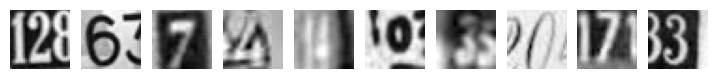

Labels for the first 10 images in the training set:
[2 6 7 4 4 0 3 0 7 3]


In [26]:
plt.figure(figsize=(9, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the corresponding labels
print("Labels for the first 10 images in the training set:")
print(y_train[:10])

### 2.2 c - Reshape all the images with appropriate shape update the data in same variable.

In [27]:
# Reshape the images in the dataset
X_train = np.reshape(X_train, (X_train.shape[0], 32, 32, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 32, 32, 1))

print("Updated shapes after reshaping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Updated shapes after reshaping:
X_train shape: (42000, 32, 32, 1)
X_test shape: (18000, 32, 32, 1)


### 2.2 d - Normalise the images i.e. Normalise the pixel values.

In [28]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

Normalizing pixel values involves scaling them to be in a standard range. For image data, it's common to normalize the pixel values between 0 and 1 by dividing each pixel value by the maximum pixel value (255 for images with pixel values ranging from 0 to 255).

### 2.2 e - Transform Labels into format acceptable by Neural Network

In [29]:
# Transform labels to categorical
num_classes = 10  # (digits 0 to 9)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### 2.2 f - Print total Number of classes in the Dataset.

In [30]:
num_class = len(np.unique(y_train))
print("Total number of classes in the dataset:", num_class)

Total number of classes in the dataset: 2


# ***Model Training & Evaluation using Neural Network***

### 2.3 a - Design a Neural Network to train a classifier.

In [31]:
# Define the neural network model
model = models.Sequential()

# Flatten the input data
model.add(layers.Flatten(input_shape=(32, 32)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               131200    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 140106 (547.29 KB)
Trainable params: 140106 (547.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.3 b - Train the classifier using previously designed Architecture (Use best suitable parameters).

In [33]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/50
657/657 [==============================] - 5s 6ms/step - loss: 2.2412 - accuracy: 0.1458 - val_loss: 2.0401 - val_accuracy: 0.2679
Epoch 2/50
657/657 [==============================] - 4s 6ms/step - loss: 1.6782 - accuracy: 0.4274 - val_loss: 1.4131 - val_accuracy: 0.5378
Epoch 3/50
657/657 [==============================] - 6s 9ms/step - loss: 1.3024 - accuracy: 0.5829 - val_loss: 1.2281 - val_accuracy: 0.6156
Epoch 4/50
657/657 [==============================] - 4s 7ms/step - loss: 1.1832 - accuracy: 0.6287 - val_loss: 1.1335 - val_accuracy: 0.6519
Epoch 5/50
657/657 [==============================] - 4s 6ms/step - loss: 1.1149 - accuracy: 0.6534 - val_loss: 1.0770 - val_accuracy: 0.6676
Epoch 6/50
657/657 [==============================] - 4s 6ms/step - loss: 1.0647 - accuracy: 0.6705 - val_loss: 1.0480 - val_accuracy: 0.6750
Epoch 7/50
657/657 [==============================] - 6s 9ms/step - loss: 1.0152 - accuracy: 0.6855 - val_loss: 1.0019 - val_accuracy: 0.6925
Epoch 

### 2.3 c - Evaluate performance of the model with appropriate metrics

In [34]:
y_pred=model.predict(X_test)

563/563 [==============================] - 1s 2ms/step


In [35]:
# Convert one-hot encoded y_test to integer labels
y_test_int = np.argmax(y_test, axis=1)

In [36]:
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

Let's now generate classification report to check the performance of the model.

In [37]:
print(classification_report(y_test_int, y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1814
           1       0.79      0.83      0.81      1828
           2       0.83      0.81      0.82      1803
           3       0.83      0.69      0.76      1719
           4       0.81      0.83      0.82      1812
           5       0.73      0.77      0.75      1768
           6       0.66      0.85      0.74      1832
           7       0.84      0.83      0.83      1808
           8       0.77      0.72      0.74      1812
           9       0.88      0.71      0.79      1804

    accuracy                           0.79     18000
   macro avg       0.80      0.79      0.79     18000
weighted avg       0.80      0.79      0.79     18000



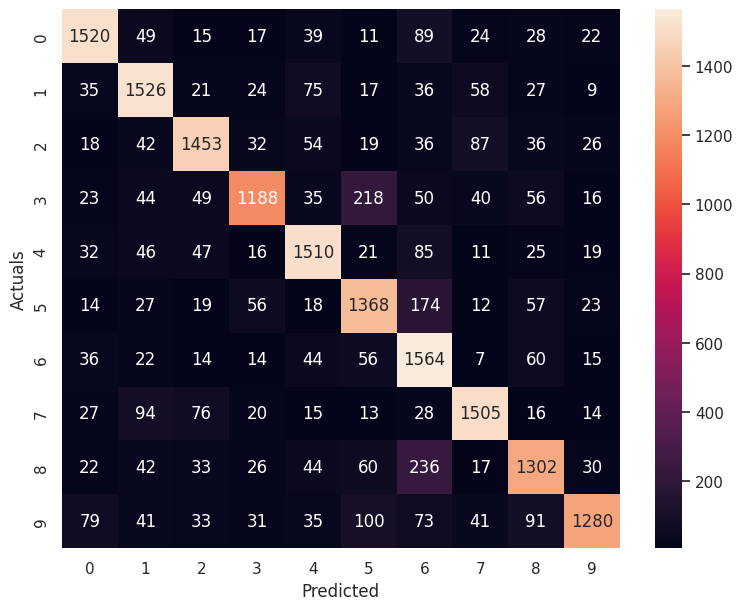

In [38]:
cm=confusion_matrix(y_test_int,y_pred_classes)

plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

### 2.3 d - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

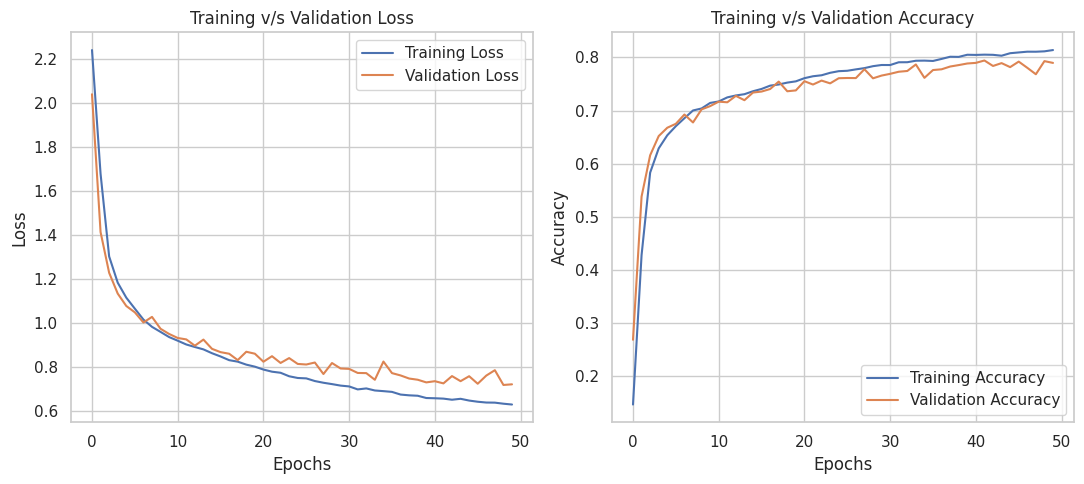

In [39]:
plt.figure(figsize=(11, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### **Training and Validation Loss:**

* Both training and validation loss initially decreased significantly in the early epochs, indicating the model was learning and generalizing well.
* There's a consistent decreasing trend in both training and validation loss up to around epoch 20.
* After epoch 20, the validation loss seems to fluctuate slightly while the training loss continues to decrease, indicating possible overfitting as the model might be fitting too closely to the training data.

### **Training and Validation Accuracy:**

* The training accuracy consistently increased with each epoch, reaching around 80.57% at epoch 50.
* Validation accuracy also increased but appeared to stagnate after around epoch 20, hovering around 78-79%, suggesting the model's performance plateaued and might not improve significantly beyond this point.

### **Overfitting:**

* There is a clear indication of overfitting as the training accuracy continued to improve while the validation accuracy plateaued or showed little improvement after a certain epoch.
* The training loss continued to decrease, but the validation loss either stagnated or showed fluctuations, indicating a lack of generalization on unseen data.


# <center><span style="font-family: Arial; font-weight:bold;font-size:2.3em;">End Of Project